In [2]:
!pip install diagrams

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 52.2 MB/s eta 0:00:00


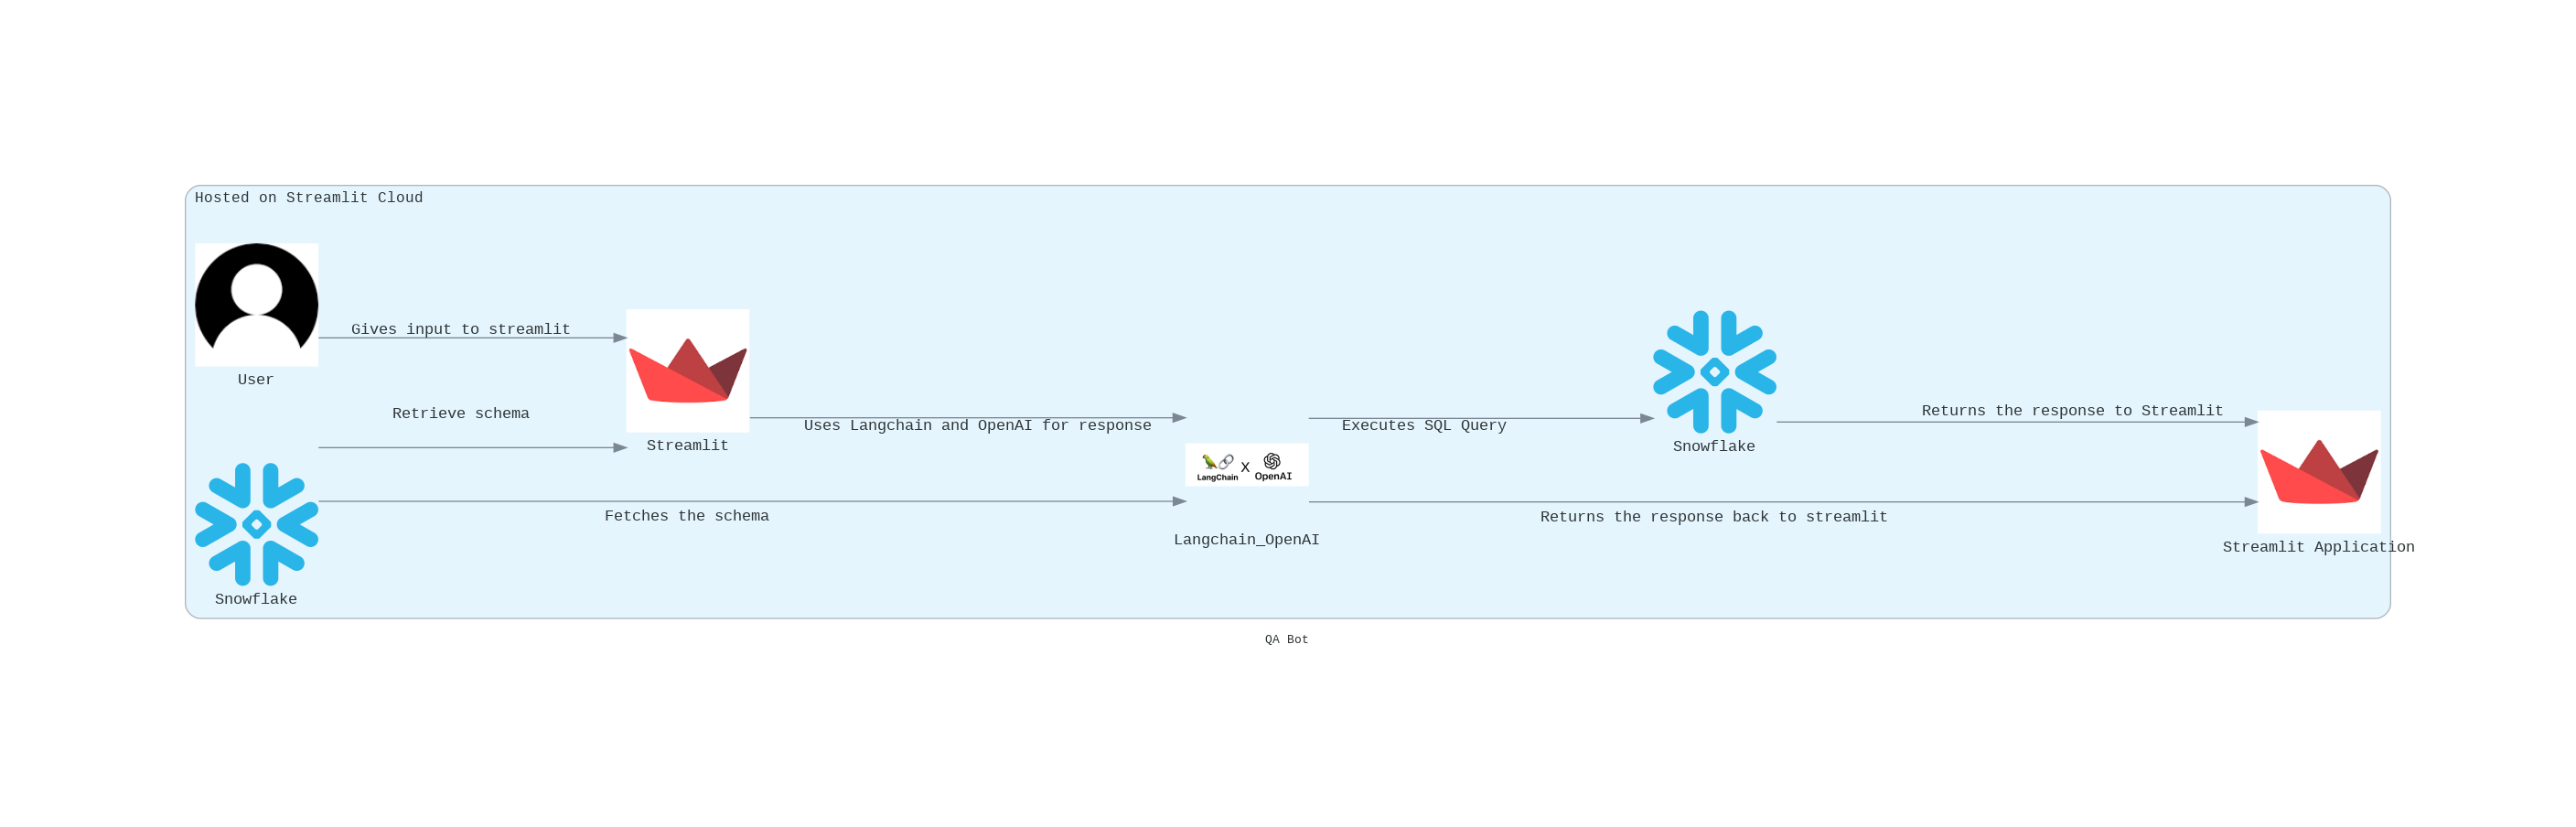

In [13]:
from diagrams import Diagram, Cluster, Edge
from diagrams.generic.database import SQL
from diagrams.custom import Custom

graph_attr = {
    "fontsize": "10"
}

with Diagram("QA Bot", show=False, direction="LR", graph_attr=graph_attr) as diag:
  with Cluster("Hosted on Streamlit Cloud") as sa:
    user = Custom("User", "/content/user.png")
    streamlit = Custom("Streamlit", "/content/streamlit.png")
    streamlit_1 = Custom("Streamlit Application", "/content/streamlit.png")
    snowflake = Custom("Snowflake", "/content/snowflake.png")
    openai_langchain = Custom("Langchain_OpenAI", "/content/openai_langchain.png")
    snowflake_1 = Custom("Snowflake", "/content/snowflake.png")


  user >> Edge(label = "Gives input to streamlit") >> streamlit
  streamlit >> Edge(label = "Uses Langchain and OpenAI for response") >> openai_langchain
  openai_langchain >> Edge(label = "Returns the response back to streamlit") >> streamlit_1
  snowflake >> Edge(label = "Retrieve schema") >> streamlit
  snowflake >> Edge(label = "Fetches the schema") >> openai_langchain
  openai_langchain >> Edge(label = "Executes SQL Query") >> snowflake_1
  snowflake_1 >> Edge(label = "Returns the response to Streamlit") >> streamlit_1

diag

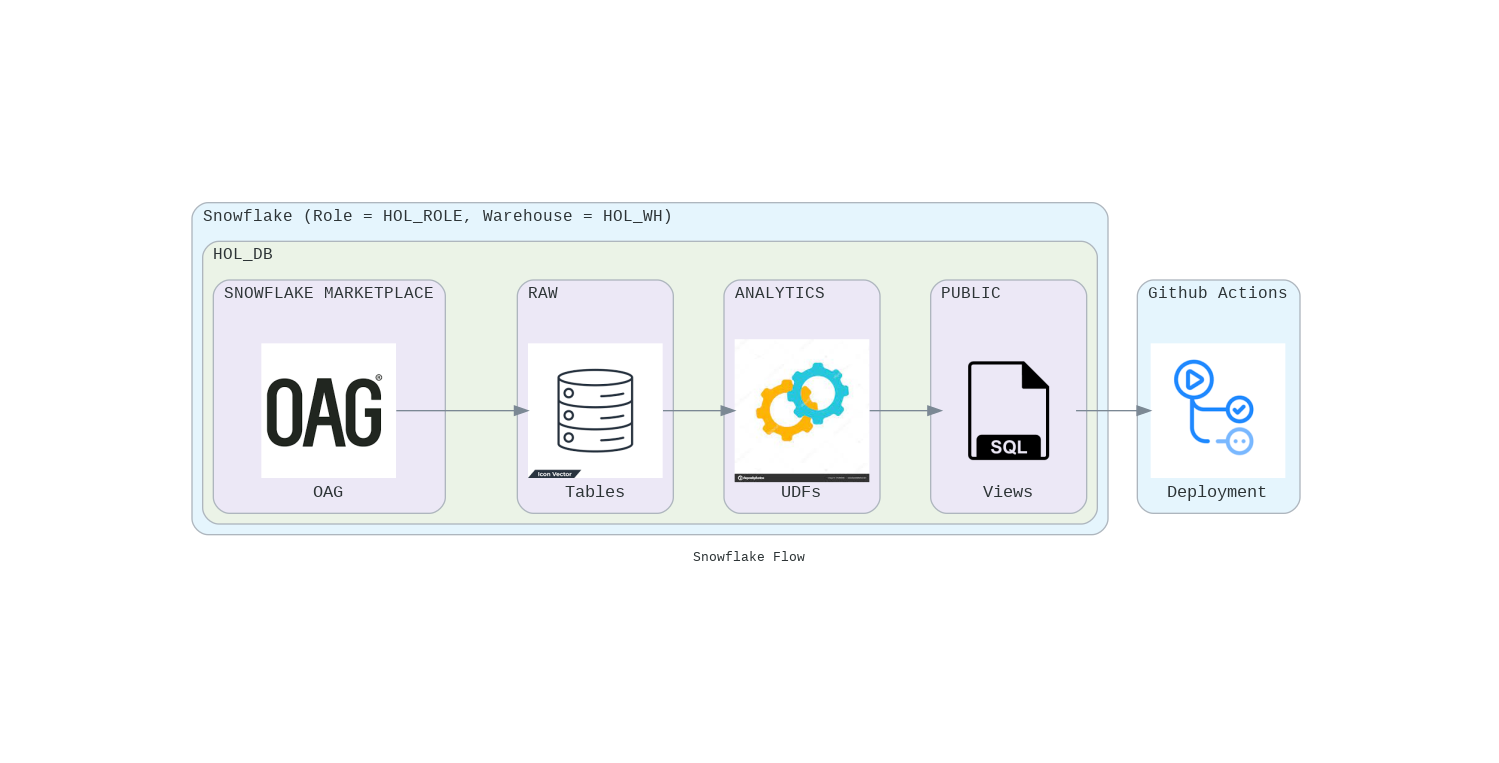

In [31]:
from diagrams import Diagram, Cluster, Edge
from diagrams.generic.database import SQL
from diagrams.custom import Custom

graph_attr = {
    "fontsize": "10"
}

with Diagram("Snowflake Flow", show=False, direction="LR", graph_attr=graph_attr) as diag:
  with Cluster("Snowflake (Role = HOL_ROLE, Warehouse = HOL_WH)") as sf:
    with Cluster("HOL_DB") as db:
      with Cluster("SNOWFLAKE MARKETPLACE") as smp:
        oag = Custom("OAG", "/content/oag.png")
      with Cluster("RAW") as raw:
        tables = Custom("Tables", "/content/database.png")

      with Cluster("PUBLIC") as view:
        views = SQL("Views")

      with Cluster("ANALYTICS") as udf:
        udfs = Custom("UDFs", "/content/function.jpeg")

  with Cluster("Github Actions") as ga:
    github_actions = Custom("Deployment", "/content/github_actions.png")

  oag >> tables >> udfs >> views >> github_actions

diag